In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [ ]:
titanic_data=pd.read_csv('train.csv')

## Variable Information: <br>
1.**Pclass**- Ticket class <br>
2.**SibSp**	- # of siblings / spouses aboard the Titanic	<br>
3.**Parch**	- # of parents / children aboard the Titanic	<br>
4.**Embarked**-  Port of Embarkation(KEYS=C = Cherbourg, Q = Queenstown, S = Southampton)

In [ ]:
titanic_data.head()  #To Show Starting 5 entries

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_data.describe()  #To generate descriptive statistics of a DataFrame or Series.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# To Find the Correlation

In [ ]:
import seaborn as sns

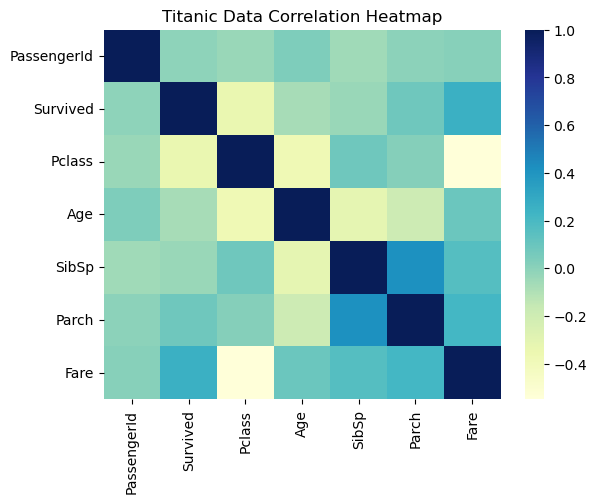

In [ ]:
numeric_data = titanic_data.select_dtypes(include=['number'])

# Plot the heatmap
sns.heatmap(numeric_data.corr(), cmap="YlGnBu")
plt.title("Titanic Data Correlation Heatmap")
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_indices, test_indices in split.split(titanic_data, titanic_data[["Survived", "Pclass", "Sex"]]):
    strat_train_set = titanic_data.loc[train_indices]
    strat_test_set = titanic_data.loc[test_indices]


<Axes: >

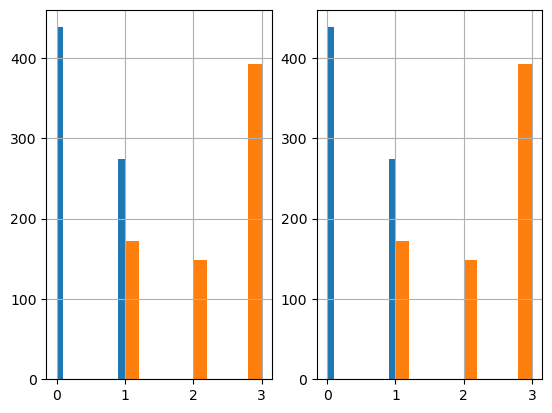

In [ ]:
plt.subplot(1,2,1)
strat_train_set["Survived"].hist()
strat_train_set["Pclass"].hist()

plt.subplot(1,2,2)
strat_train_set["Survived"].hist()
strat_train_set["Pclass"].hist()

In [ ]:
 #A quick inspection of the dataset reveals that the Age column has a significant number of missing values (147 out of 712), while most other columns like Sex, Pclass, and Fare are complete.

In [ ]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 867 to 802
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          565 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        167 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


## Estimators

In [ ]:
from sklearn.base import BaseEstimator,TransformerMixin  #(Gives your custom class,Takes in raw data and transforms it)
from sklearn.impute import SimpleImputer  #Effective way to fill in (or “impute”) missing values.

class AgeImputer(BaseEstimator,TransformerMixin):

    def fit(self,X,y=None):
        return self

    def transform(self,X):
        imputer = SimpleImputer(strategy="mean") 
        X['Age'] = imputer.fit_transform(X[['Age']]) 
        
        return X
    

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):  
        return self

    def transform(self, X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[["Embarked"]]).toarray()

        column_names = ["C", "S", "Q", "N"]

        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]

        matrix = encoder.fit_transform(X[["Sex"]]).toarray()

        column_names = ["Female", "Male"]

        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]  

        return X


In [ ]:
# Feature Dropper

In [ ]:
class FeatureDropper(BaseEstimator,TransformerMixin):

   
    def fit(self, X, y=None):  
        return self

    def transform(self, X):
        return X.drop(["Embarked","Name","Ticket","Cabin","Sex","N"],axis=1,errors="ignore")

In [ ]:
from sklearn.pipeline import Pipeline

pipeline=Pipeline([("ageimputer", AgeImputer()),
                   ("featureencoder",FeatureEncoder()),
                   ("featuredropper",FeatureDropper())])

In [ ]:
strat_train_set# --- Fit pipeline on train, transform test ---
strat_train_set = pipeline.fit_transform(strat_train_set)
strat_test_set = pipeline.transform(strat_test_set)

In [ ]:
# --- Prepare data for model ---
from sklearn.preprocessing import StandardScaler

X_train = strat_train_set.drop(['Survived'], axis=1)
y_train = strat_train_set['Survived']

X_test = strat_test_set.drop(['Survived'], axis=1)
y_test = strat_test_set['Survived']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# --- Model training ---
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()
param_grid = {
    "n_estimators": [10, 100, 200, 500],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 3, 4]
}
grid_search = GridSearchCV(clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_train_scaled, y_train)
final_clf = grid_search.best_estimator_


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
# --- Evaluate on test set ---
test_score = final_clf.score(X_test_scaled, y_test)
print("Test accuracy:", test_score)

RandomForestClassifier()

In [ ]:
# --- Prepare for submission ---
titanic_test_data = pd.read_csv("data/test.csv")
final_test_data = pipeline.transform(titanic_test_data)
final_test_data = final_test_data.fillna(method="ffill")
X_final_test_scaled = scaler.transform(final_test_data)

predictions = final_clf.predict(X_final_test_scaled)

final_df = pd.DataFrame({
    'PassengerId': titanic_test_data['PassengerId'],
    'Survived': predictions.astype(int)
})
final_df.to_csv("data/predictions.csv", index=False)
final_df.head()